# Laptop Prices Predicition

A mini project for predicting laptop prices from a dataset from kaggle

In [99]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [100]:
# Loading the data set
df_laptop = pd.read_csv('laptop_prices.csv')

In [101]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [102]:
df_laptop.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [103]:
df_laptop.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [104]:
df_laptop.sample(10).T

,9290,4162,1596,10429,9220,8655,233,11506,545,7311
Brand,Apple,Apple,MSI,Razer,Asus,Samsung,Microsoft,Samsung,Dell,Razer
Processor,Intel i9,Intel i3,Intel i9,Intel i7,Intel i9,AMD Ryzen 3,AMD Ryzen 3,Intel i3,AMD Ryzen 5,AMD Ryzen 5
RAM (GB),8,64,32,32,64,32,32,8,8,64
Storage,1TB HDD,1TB HDD,2TB SSD,2TB SSD,1TB HDD,1TB SSD,2TB SSD,2TB SSD,1TB SSD,1TB HDD
GPU,AMD Radeon RX 6600,Nvidia RTX 3080,Nvidia RTX 3080,Nvidia RTX 3080,Nvidia RTX 3080,AMD Radeon RX 6600,Nvidia GTX 1650,AMD Radeon RX 6600,Nvidia RTX 3060,Integrated
Screen Size (inch),15.6,16.0,16.0,16.0,13.3,16.0,17.3,13.3,17.3,13.3
Resolution,3840x2160,1366x768,1920x1080,3840x2160,1366x768,2560x1440,2560x1440,1366x768,2560x1440,1920x1080
Battery Life (hours),6.6,9.1,4.8,8.5,4.1,5.4,7.7,7.8,7.6,6.9
Weight (kg),1.65,2.94,2.78,3.25,2.87,2.21,1.38,3.46,2.67,2.23
Operating System,Windows,FreeDOS,FreeDOS,FreeDOS,FreeDOS,Linux,FreeDOS,FreeDOS,Windows,Windows


In [105]:
df_laptop.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [106]:
df_laptop.duplicated().sum()

0

In [107]:
totalbybrand = df_laptop.groupby('Brand').size().reset_index(name='Laptop Count')

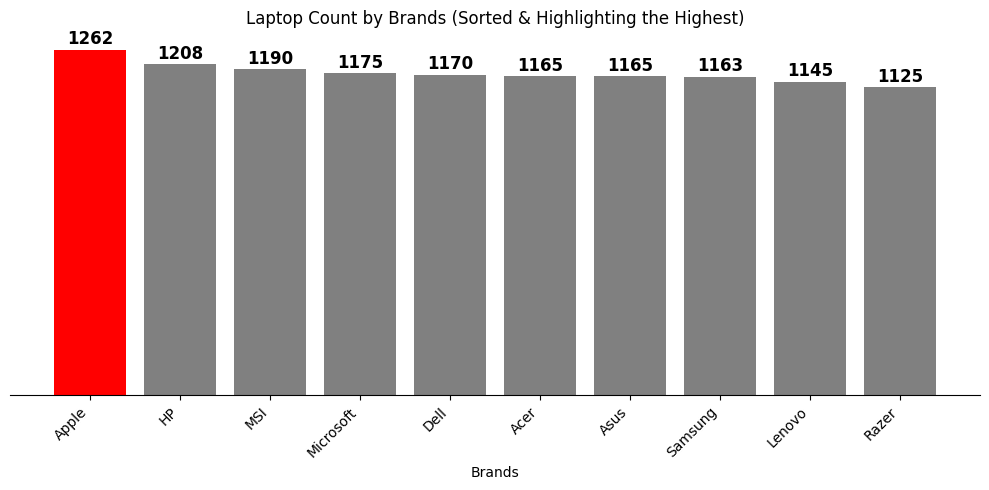

In [108]:
# Group by brand and count laptops
totalbybrand = df_laptop.groupby('Brand').size().reset_index(name='Laptop Count')

# Sort data in descending order
totalbybrand = totalbybrand.sort_values(by='Laptop Count', ascending=False).reset_index(drop=True)

# Identify the highest value after sorting
max_value = totalbybrand['Laptop Count'].iloc[0]  # Highest count
max_brand = totalbybrand['Brand'].iloc[0]  # Brand with highest count

# Set colors (Highlight max value, others gray)
bar_colors = ['red' if brand == max_brand else 'gray' for brand in totalbybrand['Brand']]

# Create the Matplotlib bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(totalbybrand['Brand'], totalbybrand['Laptop Count'], color=bar_colors)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Remove top, right, and left spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove Y-axis ticks
ax.set_yticks([])

# Rotate X labels for better visibility
plt.xticks(rotation=45, ha="right")

# Add title and labels
plt.title("Laptop Count by Brands (Sorted & Highlighting the Highest)")
plt.xlabel("Brands")
plt.ylabel("")

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show plot
plt.show()

In [109]:
corr_matrix = df_laptop.corr(method = 'spearman', numeric_only = True)
corr_matrix

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
RAM (GB),1.000000,0.011943,0.004316,-0.005993,0.613535
Screen Size (inch),0.011943,1.000000,0.006749,-0.015633,0.074480
Battery Life (hours),0.004316,0.006749,1.000000,-0.001925,0.004136
Weight (kg),-0.005993,-0.015633,-0.001925,1.000000,0.003671
Price ($),0.613535,0.074480,0.004136,0.003671,1.000000


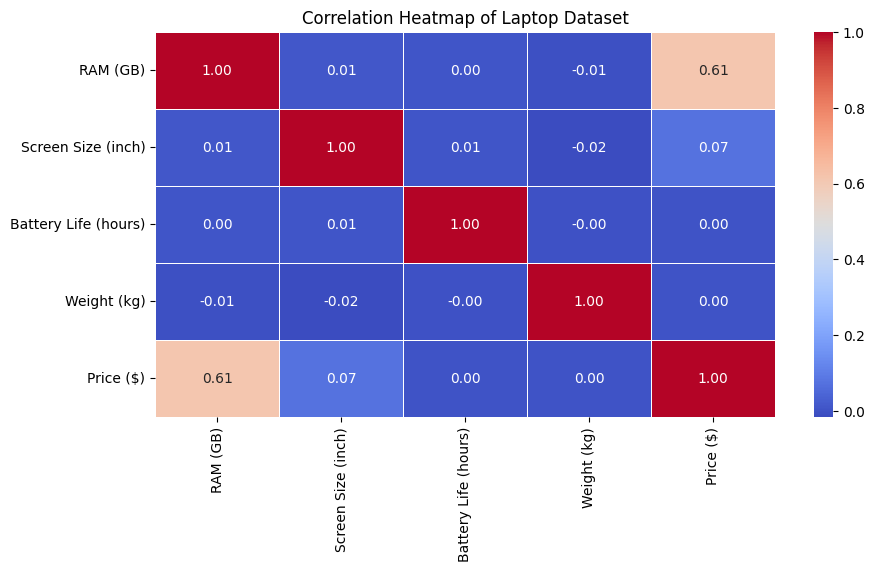

In [110]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidth=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Laptop Dataset")

plt.show()

In [111]:
df_laptop['Storage'].value_counts()

Storage
512GB SSD    2420
2TB SSD      2415
256GB SSD    2318
1TB SSD      2313
1TB HDD      2302
Name: count, dtype: int64

In [112]:
df_laptop['Laptop_ID'] = df_laptop.index

In [113]:
df_laptop

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Laptop_ID
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,0
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,3
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,11763
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,11764
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,11765
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,11766


In [114]:
# function to transform storage values
def transform_storage(value):
    # split into size and type
    size, disk_type = value.split()

# convert TeraByte to GigaByte (1 TB = 1024 GB)
    if 'TB' in size:
        size_gb = float(size.replace('TB', '')) * 1024
    else:
        size_gb = float(size.replace('GB',''))
    return size_gb, disk_type

df_laptop[['Storage Size (GB)', 'Disk Type']] = df_laptop['Storage'].apply(lambda x: pd.Series(transform_storage(x)))

df_laptop['Storage Size (GB)'] = df_laptop['Storage Size (GB)'].astype(float)

df_laptop[['Storage', 'Storage Size (GB)', 'Disk Type']]

,Storage,Storage Size (GB),Disk Type
0,512GB SSD,512.0,SSD
1,1TB SSD,1024.0,SSD
2,2TB SSD,2048.0,SSD
3,256GB SSD,256.0,SSD
4,256GB SSD,256.0,SSD
...,...,...,...
11763,2TB SSD,2048.0,SSD
11764,2TB SSD,2048.0,SSD
11765,2TB SSD,2048.0,SSD
11766,512GB SSD,512.0,SSD


In [115]:
df_laptop['Disk Type Numeric'] = df_laptop['Disk Type'].map({'HDD': 0, 'SSD': 1})

In [116]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
 11  Laptop_ID             11768 non-null  int64  
 12  Storage Size (GB)     11768 non-null  float64
 13  Disk Type             11768 non-null  object 
 14  Disk Type Numeric     11768 non-null  int64  
dtypes: float64(5), int6

In [117]:
# Define performance-based ranking for processors
processor_mapping = {
    'Intel i3': 1, 'Intel i5': 2, 'Intel i7': 3, 'Intel i9': 4,
    'AMD Ryzen 3': 1, 'AMD Ryzen 5': 2, 'AMD Ryzen 7': 3, 'AMD Ryzen 9': 4
}

df_laptop['Processor Rank'] = df_laptop['Processor'].map(processor_mapping)


In [118]:
gpu_mapping = {
    'Integrated': 1,  
    'Nvidia GTX 1650': 2,
    'AMD Radeon RX 6600': 3,
    'AMD Radeon RX 6800': 4,
    'Nvidia RTX 2060': 5,
    'Nvidia RTX 3060': 6,
    'Nvidia RTX 3080': 7
}

df_laptop['GPU Rank'] = df_laptop['GPU'].map(gpu_mapping)


In [119]:
# Replace brand with the average price of its laptops
brand_avg_price = df_laptop.groupby('Brand')['Price ($)'].mean()
df_laptop['Brand Score'] = df_laptop['Brand'].map(brand_avg_price)


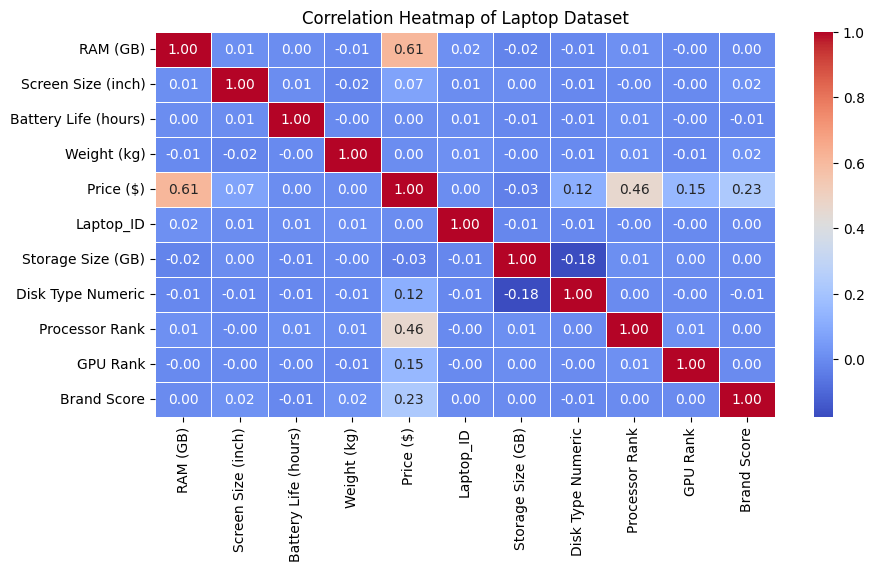

In [120]:
corr_matrix = df_laptop.corr(method = 'spearman', numeric_only = True)
corr_matrix
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidth=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Laptop Dataset")

plt.show()

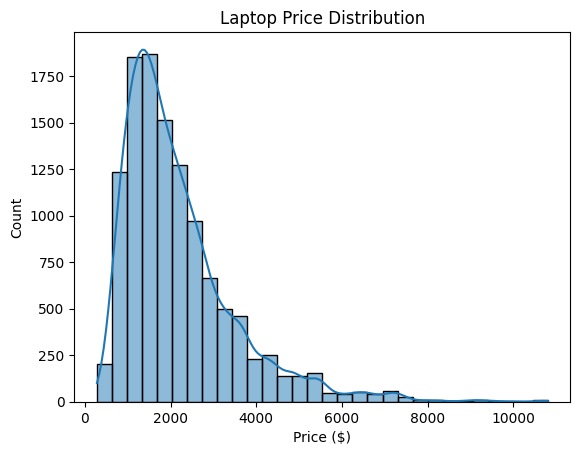

In [121]:
sns.histplot(df_laptop['Price ($)'], bins=30, kde=True)
plt.title("Laptop Price Distribution")
plt.show()


In [122]:
df_laptop['Log Price'] = np.log1p(df_laptop['Price ($)'])

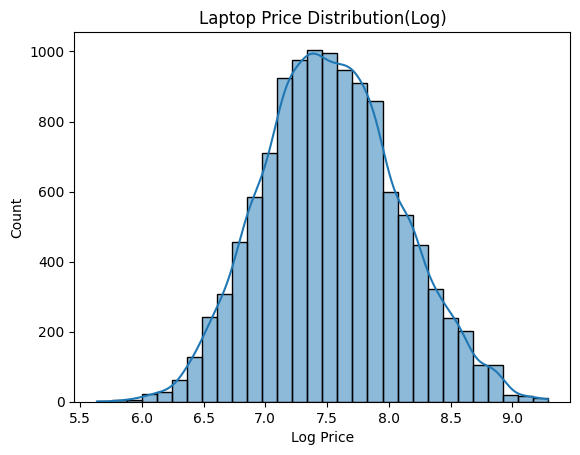

In [123]:
sns.histplot(df_laptop['Log Price'], bins=30, kde=True)
plt.title("Laptop Price Distribution(Log)")
plt.show()


In [124]:
correlations = df_laptop[['Price ($)', 'RAM (GB)', 'Processor Rank', 'GPU Rank']].corr()
print(correlations['Price ($)'])

Price ($)         1.000000
RAM (GB)          0.616221
Processor Rank    0.429260
GPU Rank          0.126058
Name: Price ($), dtype: float64


In [125]:
# Get absolute correlations with price
weights = correlations['Price ($)'].abs()

# Normalize weights so they sum to 1
weights = weights / weights.sum()

# Display new weights
print(weights)

Price ($)         0.460503
RAM (GB)          0.283772
Processor Rank    0.197675
GPU Rank          0.058050
Name: Price ($), dtype: float64


In [126]:
df_laptop['Performance Score'] = (
    df_laptop['RAM (GB)'] * weights['RAM (GB)'] +
    df_laptop['Processor Rank'] * weights['Processor Rank'] +
    df_laptop['GPU Rank'] * weights['GPU Rank']
)


In [128]:
# exporting cleaned and transformed data to a csv file
df_laptop.to_csv("C:/Users/salem/OneDrive/project/laptop_prices/Laptop Prices Cleaned.csv")

### Linear Regression Model

In [130]:
features = ['RAM (GB)', 'Processor Rank', 'GPU Rank', 'Disk Type Numeric', 'Brand Score', 'Performance Score']

In [131]:
X = df_laptop[features]
y = df_laptop['Price ($)']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

In [134]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [135]:
print(f"Baseline Model Performance:")
print(f"Root Mean Sqaured Error (RMSE): {rmse:.2f}")
print(f" R squared Score: {r2: .2f}")

Baseline Model Performance:
Root Mean Sqaured Error (RMSE): 783.67
 R squared Score:  0.65


### Random Forest Model

In [137]:
rf_model = RandomForestRegressor(n_estimators=700, max_depth=30, random_state=42)

In [138]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=700, random_state=42)

In [139]:
y_pred_rf = rf_model.predict(X_test)

In [140]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [141]:
print(f"Random Forest Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Model Performance:
Root Mean Squared Error (RMSE): 736.49
R² Score: 0.69


### XGBoost Model

In [143]:
xgb_model = XGBRegressor(n_estimators=250, learning_rate=0.05, max_depth=9, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [144]:
y_pred_xgb = xgb_model.predict(X_test)

In [145]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [146]:
print(f"XGBoost Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

XGBoost Model Performance:
Root Mean Squared Error (RMSE): 735.20
R² Score: 0.69


In [147]:
# Create a DataFrame with Predictions
df_results = df_laptop.loc[y_test.index, ['Laptop_ID']]  # Select matching rows
df_results['Actual Price'] = y_test.values
df_results['Predicted Price'] = y_pred_xgb  # Use the appropriate model's predictions

Predictions saved to laptop_price_predictions.csv


In [149]:
# Save to CSV for Power BI
df_results.to_csv("C:/Users/salem/OneDrive/project/laptop_prices/Predictions saved to laptop_price_predictions.csv", index=False)
print("C:/Users/salem/OneDrive/project/laptop_prices/Predictions saved to laptop_price_predictions.csv")

C:/Users/salem/OneDrive/project/laptop_prices/Predictions saved to laptop_price_predictions.csv


From the analysis process i have concluded that this dataset has a big possiblity of being synthetic, the data value distrubtion is equal, show no significant sign of correlation, the prices are somewhat spreadout equally, 
<br>
After importing to power BI, visualizations showed signs of being synthetic.
<br>
>Therefore, I decided to end the project here.